In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

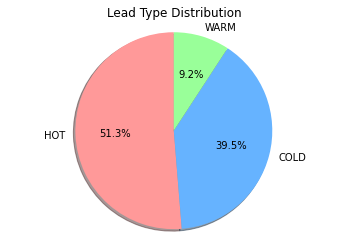

In [3]:


# Load the dataset
file_path = "Sales-3 combined.csv"
df = pd.read_csv(file_path)

# Calculate counts of 'HOT', 'WARM', 'COLD', and empty cells in 'Lead Type'
lead_type_counts = df['Lead Type'].value_counts(dropna=False)

# Pie chart
labels = lead_type_counts.index
sizes = lead_type_counts.values
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Lead Type Distribution')
plt.show()


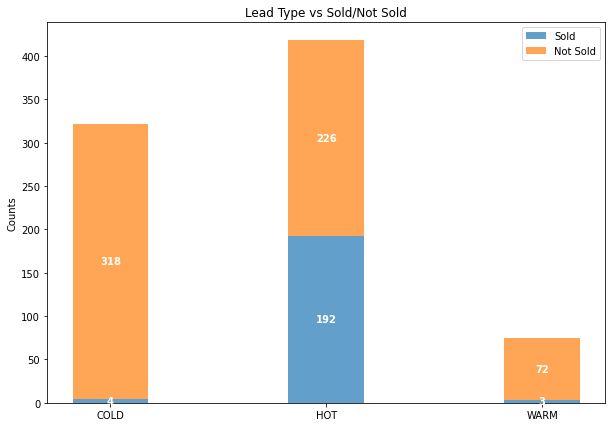

Remarks,Lead Type,not sold,sold
0,COLD,318 (98.8%),4 (1.2%)
1,HOT,226 (54.1%),192 (45.9%)
2,WARM,72 (96.0%),3 (4.0%)


In [15]:
# Normalize 'Remarks' column by standardizing 'sold' and 'not sold' values
df['Remarks'] = df['Remarks'].str.strip().str.lower()
df['Remarks'] = df['Remarks'].replace({'not sold': 'not sold', 'sold': 'sold'})

# Create a pivot table to get counts of each combination of 'Lead Type' and 'Remarks'
pivot_table = pd.pivot_table(df, values='Date', index='Lead Type', columns='Remarks', aggfunc='count', fill_value=0)

# Calculate the percentages
pivot_table_percentages = pivot_table.div(pivot_table.sum(axis=1), axis=0).multiply(100).round(1)

# Combine counts and percentages into one DataFrame
combined_table = pivot_table.astype(str) + ' (' + pivot_table_percentages.astype(str) + '%)'

# Reset index to make 'Lead Type' a column again
combined_table.reset_index(inplace=True)




###===========================================================================================================
# Normalize 'Remarks' column by standardizing 'sold' and 'not sold' values
df['Remarks'] = df['Remarks'].str.strip().str.lower()
df['Remarks'] = df['Remarks'].replace({'not sold': 'Not Sold', 'sold': 'Sold'})

# Filter data for HOT, WARM, COLD categories
filtered_df = df[df['Lead Type'].isin(['HOT', 'WARM', 'COLD'])]

# Create counts for 'Sold' and 'Not Sold' for each category
category_counts = filtered_df.groupby(['Lead Type', 'Remarks']).size().unstack(fill_value=0)

# Extract data for plotting
categories = category_counts.index
sold_counts = category_counts['Sold'].tolist()
not_sold_counts = category_counts['Not Sold'].tolist()

N = len(categories)
ind = range(N)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 7))

# Plot bars for 'Sold' and 'Not Sold'
p1 = ax.bar(ind, sold_counts, width, label='Sold', alpha=0.7)
p2 = ax.bar(ind, not_sold_counts, width, bottom=sold_counts, label='Not Sold', alpha=0.7)

# Annotate bars with counts
for i, (sold, not_sold) in enumerate(zip(sold_counts, not_sold_counts)):
    ax.annotate(f'{sold}', (ind[i], sold/2), ha='center', va='center', color='white', weight='bold')
    ax.annotate(f'{not_sold}', (ind[i], sold + not_sold/2), ha='center', va='center', color='white', weight='bold')

ax.set_ylabel('Counts')
ax.set_title('Lead Type vs Sold/Not Sold')
ax.set_xticks(ind)
ax.set_xticklabels(categories)
ax.legend()

plt.show()
# Display the combined table
combined_table

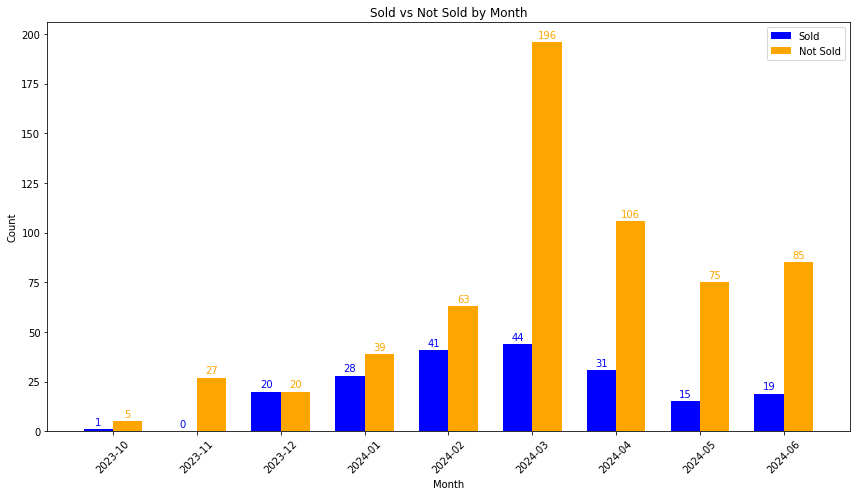

In [25]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Categorize 'Remarks' as 'sold' or 'not sold'
df['Remarks'] = df['Remarks'].str.strip().str.lower()
df['Remarks'] = df['Remarks'].replace({'not sold': 'Not Sold', 'sold': 'Sold'})

# Group by month and 'Remarks' and count occurrences
df['Month'] = df['Date'].dt.to_period('M')
monthly_counts = df.groupby(['Month', 'Remarks']).size().unstack(fill_value=0)

# Plotting
months = monthly_counts.index.astype(str)  # Convert PeriodIndex to string for x-axis labels
bar_width = 0.35
index = np.arange(len(months))

fig, ax = plt.subplots(figsize=(12, 7))

sold_bars = ax.bar(index, monthly_counts['Sold'], bar_width, label='Sold', color='blue')
not_sold_bars = ax.bar(index + bar_width, monthly_counts['Not Sold'], bar_width, label='Not Sold', color='orange')

# Add count labels on top of each bar
for bar in sold_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', va='bottom', color='blue', fontsize=10)

for bar in not_sold_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', va='bottom', color='orange', fontsize=10)

ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Sold vs Not Sold by Month')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(months, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

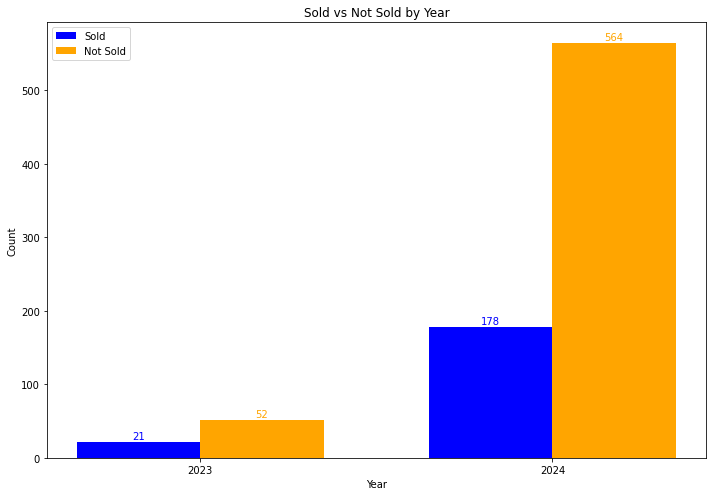

In [24]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Categorize 'Remarks' as 'sold' or 'not sold'
df['Remarks'] = df['Remarks'].str.strip().str.lower()
df['Remarks'] = df['Remarks'].replace({'not sold': 'Not Sold', 'sold': 'Sold'})

# Group by year and 'Remarks' and count occurrences
df['Year'] = df['Date'].dt.year
yearly_counts = df.groupby(['Year', 'Remarks']).size().unstack(fill_value=0)

# Plotting
years = yearly_counts.index
bar_width = 0.35
index = np.arange(len(years))

fig, ax = plt.subplots(figsize=(10, 7))

sold_bars = ax.bar(index, yearly_counts['Sold'], bar_width, label='Sold', color='blue')
not_sold_bars = ax.bar(index + bar_width, yearly_counts['Not Sold'], bar_width, label='Not Sold', color='orange')

# Add count labels on top of each bar
for bar in sold_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', va='bottom', color='blue', fontsize=10)

for bar in not_sold_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', va='bottom', color='orange', fontsize=10)

ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Sold vs Not Sold by Year')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(years)
ax.legend()

plt.tight_layout()
plt.show()